In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

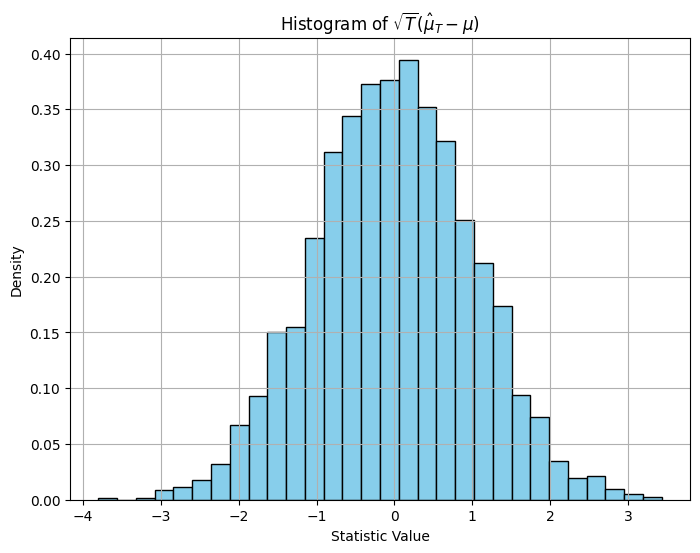

In [1]:
# Set parameters
mu = 0
T = 1000
S = 5000

# Simulate S random samples and compute MLE
samples = np.random.normal(mu, 1, (S, T))
sample_means = np.mean(samples, axis=1)

# Calculate the statistic sqrt(T)*(MLE - mu)
statistic = np.sqrt(T) * (sample_means - mu)

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(statistic, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of $\sqrt{T}(\hat{\mu}_T - \mu)$')
plt.xlabel('Statistic Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [8]:
path_mean = '/Users/veronica/Dropbox/PhD/2024_1/EC_708_Econometrics/EC_708_psets/pset4/nmean.csv'

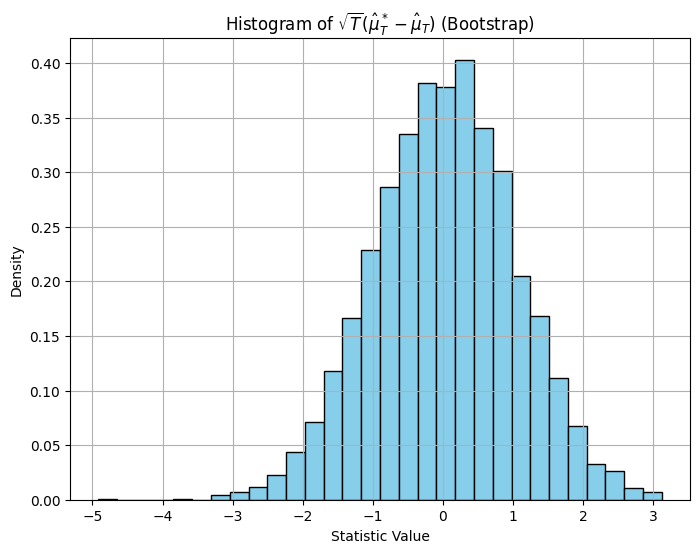

In [11]:
# Load the data from the CSV file
data = pd.read_csv(path_mean)['x']

# Set parameters
mu_hat = np.mean(data)
T = len(data)
B = 5000

# Compute MLE based on the original sample
mu_star = np.mean(data)

# Perform parametric bootstrap
bootstrap_statistics = []
for _ in range(B):
    # Resample from N(mu_hat, 1)
    bootstrap_sample = np.random.normal(mu_star, 1, T)
    # Compute MLE based on the bootstrap sample
    mu_star_bootstrap = np.mean(bootstrap_sample)
    # Calculate the statistic sqrt(T)*(MLE_star - mu_hat)
    statistic = np.sqrt(T) * (mu_star_bootstrap - mu_star)
    bootstrap_statistics.append(statistic)

# Create histogram of bootstrap statistics
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_statistics, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of $\sqrt{T}(\hat{\mu}_T^* - \hat{\mu}_T)$ (Bootstrap)')
plt.xlabel('Statistic Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()
